# Rates of Convergence

Copyright (C) 2010-2020 Luke Olson<br>
Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
from firedrake import *
import numpy as np
import matplotlib.pyplot as plt

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


## A Boundary Value Problem

Consider
$$u_{*} = \sin(\omega \pi x) \sin(\omega \pi y)$$
on the unit square with $\omega = 2$ as a start.

In [2]:
omega = 2

## Refine the Mesh and Check the Error

In [3]:
errsH0 = []
errsH1 = []
hs = []

for nx in [4, 8, 16, 32, 64, 128]: # , 256, 512]:
    print(f"Now solving {nx}x{nx}...")
    mesh = UnitSquareMesh(nx, nx)

    V = FunctionSpace(mesh, "Lagrange", 1)
    Vexact = FunctionSpace(mesh, "Lagrange", 7)

    x = SpatialCoordinate(V.mesh())
    u_exact = interpolate(sin(omega*pi*x[0])*sin(omega*pi*x[1]), Vexact)
    f = 2*pi**2*omega**2*u_exact

    # all four sides of the square
    bc = DirichletBC(V, 0.0, [1, 2, 3, 4])
    u = TrialFunction(V)
    v = TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = f*v*dx

    u = Function(V)
    solve(a == L, u, bc)

    EH0 = errornorm(u_exact, u, norm_type='L2')
    EH1 = errornorm(u_exact, u, norm_type='H1')
    errsH0.append(EH0)
    errsH1.append(EH1)
    hs.append(1/nx)

Now solving 4x4...
Now solving 8x8...
Now solving 16x16...
Now solving 32x32...
Now solving 64x64...
Now solving 128x128...


In [4]:
errsH0 = np.array(errsH0)
errsH1 = np.array(errsH1)
hs = np.array(hs)
rH0 = np.log(errsH0[1:] / errsH0[0:-1]) / np.log(hs[1:] / hs[0:-1])
rH1 = np.log(errsH1[1:] / errsH1[0:-1]) / np.log(hs[1:] / hs[0:-1])
print(rH0)
print(rH1)

[1.63571727 1.89938061 1.97405809 1.99345597 1.9983599 ]
[0.8332833  0.95536396 0.98862547 0.99714187 0.99928454]


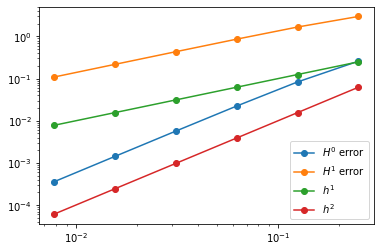

In [5]:
plt.loglog(hs, errsH0, "o-", label="$H^0$ error")
plt.loglog(hs, errsH1, "o-", label="$H^1$ error")
plt.loglog(hs, hs**1, "o-", label="$h^1$")
plt.loglog(hs, hs**2, "o-", label="$h^2$")
plt.legend()

- Now play with $\omega$ and the element order.